# 2. Xây dựng mô hình hồi quy tuyến tính cơ bản

## Khởi tạo X và y

In [464]:
import numpy as np

In [465]:
np.random.seed(42)
X_1=2*np.random.rand(100,1)
y_1=4+3*X_1 + np.random.randn(100,1)

In [466]:
# X_term để thêm 1 vào mỗi instance
X_b_1 = np.c_[np.ones((100, 1)), X_1]

## Câu 1: Hãy vẽ biểu đồ cho dữ liệu (X,y) vừa tạo ở trên

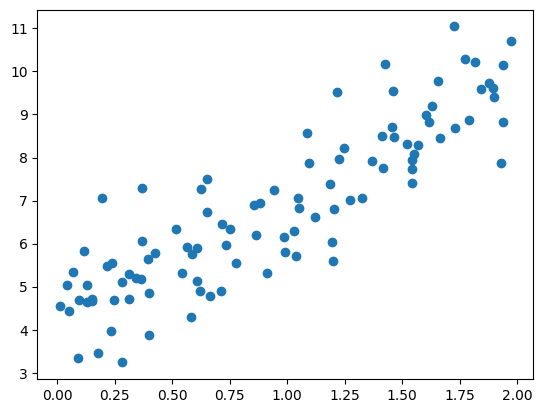

In [467]:
import matplotlib.pyplot as plt
plt.scatter(X_1, y_1)
plt.show()

## Câu 2: Hãy cho biết chiều (shape) của X_b và y

In [468]:
X_b_1.shape

(100, 2)

In [469]:
y_1.shape

(100, 1)

## Câu 3: Hãy viết code python tìm ra tham số tối ưu cho mô hình hồi quy tuyến tính.

<div style="text-align:center">

$$
\hat{\theta} = (X^TX)^{-1}X^Ty
$$

</div>

In [470]:
theta_hat = np.linalg.inv(X_b_1.T@X_b_1)@(X_b_1.T)@y_1
theta_hat

array([[4.21509616],
       [2.77011339]])

**Tạo X_new test**

In [471]:
X_new_1 = np.array([[0], [2]])
X_new_b_1 = np.c_[np.ones((2, 1)), X_new_1]

## Câu 4: Hãy dùng tham số tối ưu của hồi quy tuyến tính vừa tìm được ở Câu 3, dự đoán kết quả cho X_new_b. Giá trị dự đoán lưu vào biến y_pred

In [472]:
y_pred=X_new_b_1@theta_hat
y_pred

array([[4.21509616],
       [9.75532293]])

## Câu 5: Hãy vẽ biểu đồ thể hiện kết quả dự đoán trên dữ liệu

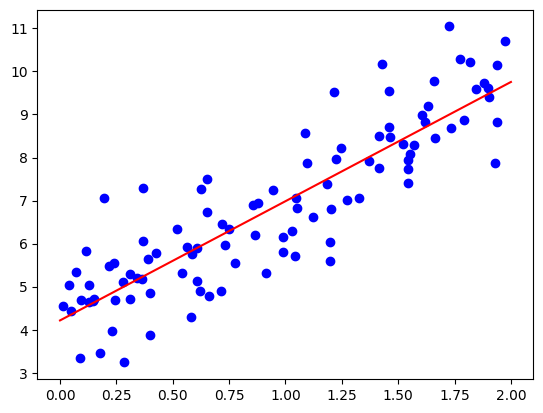

In [473]:
plt.scatter(X_1, y_1,color='b')
plt.plot(X_new_1, y_pred, 'r-')
plt.show()

# 3. Bài tập

## Bài 1: Thực hiện lại các câu hỏi (Câu 1 đến Câu 5) trong mục 2 để xây dựng lại mô hình hồi quy tuyến tính

## Bài 2: Thực hiện xây dựng mô hình hồi quy đa thức (Polynomial Regression) cho dữ liệu đa thức như sau

**Dữ liệu huấn luyện:**

In [474]:
m=100
X_2 = 6 * np.random.rand(m, 1) - 3
y_2 = 0.5 * X_2**2 + X_2 + 2 + np.random.randn(m, 1)

**Dữ liệu dự đoán:**

In [475]:
X_new_2 = np.linspace(-3, 3, 100).reshape(100, 1)

**Gợi ý: sử dụng lớp PolynomialFeatures trong sklearn để chuyển giá trị trong X và X_new về thành dạng bậc 2 (dữ liệu phi tuyến) theo đoạn code mẫu như sau:**

In [476]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,
include_bias=False)
X_poly = poly_features.fit_transform(X_2)

In [477]:
X_poly_b= np.c_[np.ones((100, 1)), X_poly]

In [478]:
theta_hat = np.linalg.inv(X_poly_b.T@X_poly_b)@(X_poly_b.T)@y_2
theta_hat

array([[1.99958228],
       [1.04630034],
       [0.5015459 ]])

**Vẽ đồ thị để xem khả năng học của mô hình**

In [479]:
X_new_poly_b= np.c_[np.ones((100, 1)), poly_features.transform(X_new_2)]

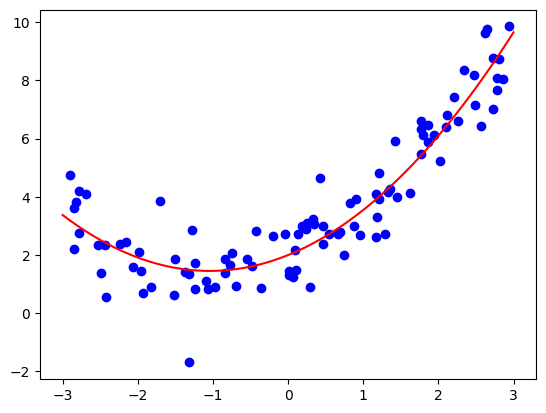

In [480]:
plt.scatter(X_2, y_2,color='b')
plt.plot(X_new_2.flatten(),(X_new_poly_b@theta_hat).flatten(),color='r')
plt.show()

## Bài 3: Hãy xây dựng mô hình hồi quy Ridge. Thực hiện tương tự như Bài 1.
- Gợi ý: Tham số tối ưu cho mô hình Ridge Regression được tính như sau:

<div style="text-align:center">

$$
\theta = (X^TX+{\alpha}I)^{-1}X^Ty
$$ 

</div>